In [1]:
from math import factorial as facto
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Tennis problem

In a certain game of tennis, **A**lex has a 
60% probability to win any given point against **B**lake. The player who gets to 
4 points first wins the game, and points cannot end in a tie. What's the best description of Alex's probability to win the game?

The solution claimed that, by playing more than one point, Alex increases his probability of winning the game. This lesson explores a step-by-step analysis of how to calculate this probability, and investigates what happens if the probabilities or number of points changes.

Assumption:
- All probability of scoring a point by a player is independent across time (factors that can affect subsequent scores, eg stamina, are ignored).
- A is referred as the winner/player. B is referred to as loser/opponent.

## 1. Combination of possible scores, given score-to-win and opponent score

#### Intuition:
In a game where first-to-4 wins:
- if opponent scores 0 point: only 1 scenario can happen (**AAA**-A)

- if opponent scores 1 point: 4 scenarios (**BAAA**-A, **ABAA**-A, **AABA**-A, **AAAB**-A )

- opponent scores 2 points:
>- Total points in the game: 4+2 => points-to-win by player (w) + points-by-opponent (k)
>- Since the last point is scored by the player: **XXXXX**-A 
>- => how many combinations of scoring by opponent in the first 5 points **XXXXX**-A? (**BBAAA**-A, **BABAA**-A, ...)


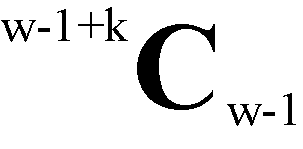   OR   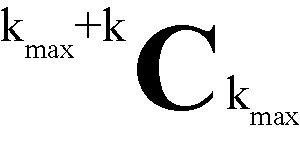

### Question 1. 
If first to 4 points to win, and A win, then how many combination of scoring?

In [2]:
# Combination(from n, pick r) = n! / [(n-r)! * r!]
def combo(n,r):
    return int(facto(n)/(facto(n-r) * facto(r)))

In [3]:
w = 4
kmax = w-1

In [4]:
# when opponent score 0
# from kmax + k, pick kmax
k = 0
k0 = combo(kmax+k, kmax)
k0

1

In [5]:
# when opponent score 1
k = 1
k1 = combo(kmax+k, kmax)
k1

4

In [6]:
# opponent score 2
k = 2
k2 = combo(kmax+k, kmax)
k2

10

In [7]:
# opponent score 3
k = 3
k3 = combo(kmax+k, kmax)
k3

20

In [8]:
# Total
k0 + k1 + k2 + k3

35

In [9]:
# or can be simplified as
w = 4
kmax = w-1

sum([combo(kmax+k, kmax) for k in range(0,4)])

35

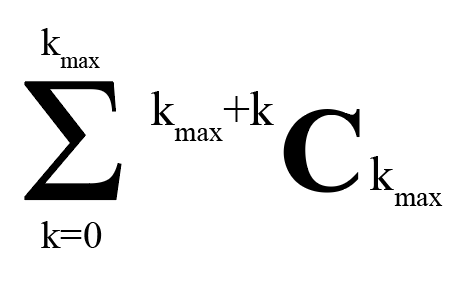

## 2. Probability of winning in with regards to points-to-win

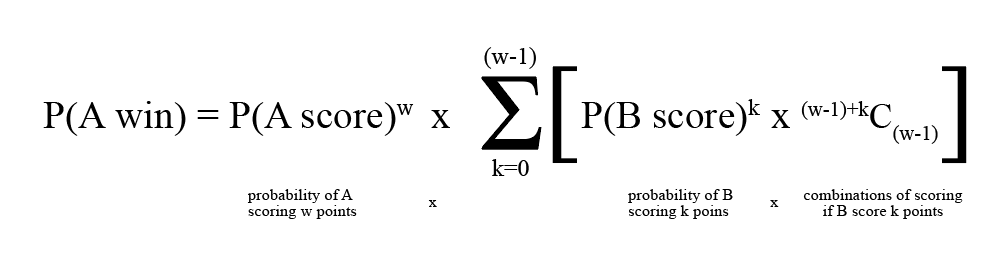

In [10]:
# Probability of winning at w given Pscore
def p_win(Pscore, w):
    probab_winning = Pscore**w * sum([(1-Pscore)**k * combo(w-1+k, w-1) for k in range(0, w)])
    return round(probab_winning, 4)

### Question 2: 
at Pscore = 0.6 and score 4 to win, what's the probability of winning?
In other words, how's the probability of winning increase with w?

In [11]:
# probability of winning if need 2 points to win
Pscore = 0.6
w = 2

p_win(Pscore, w)

0.648

In [12]:
# probability of winning if need 3 points to win
Pscore = 0.6
w = 3

p_win(Pscore, w)

0.6826

In [13]:
# probability of winning if need 4 points to win
Pscore = 0.6
w = 4

p_win(Pscore, w)

0.7102

In [14]:
# probability of winning if need 10 points to win
Pscore = 0.6
w = 10

p_win(Pscore, w)

0.8139

The probability for A to win increases with more points required to win.

### Question 3: 

At which w with P(score) = 0.6 that has the same P(win) with w = 4, P(score) = 0.7

(0.5, 1.0)

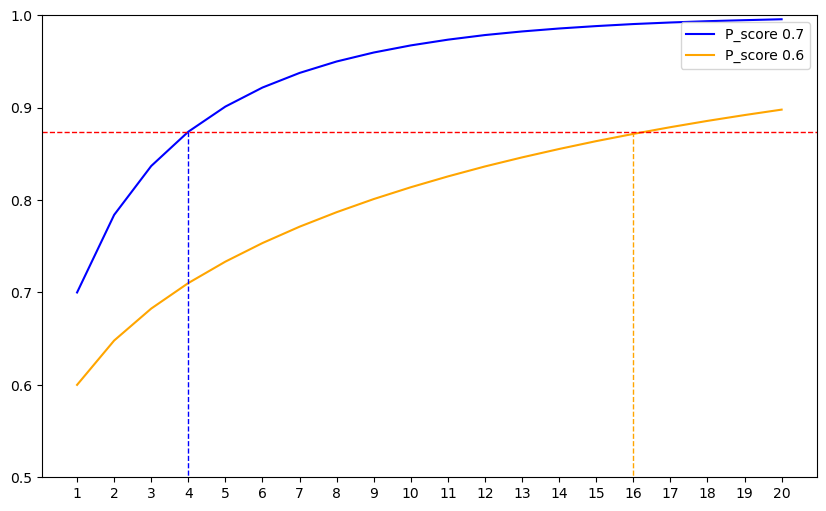

In [15]:
plt.figure(figsize=(10,6))

# points-to-win from 1 to 20
w_range = np.arange(1,21,1)

# player with P(score) - 0.7
ax = sns.lineplot(x= [w for w in w_range] ,y = [p_win(0.7, w) for w in w_range], label='P_score 0.7', color='b')

# player with P(score) - 0.6
sns.lineplot(x= [w for w in w_range] ,y = [p_win(0.6, w) for w in w_range], label='P_score 0.6', ax=ax, color='orange')

# probability of P(0.7) win at 4 points
plt.axhline(p_win(0.7, 4), color='r', linestyle ='--',linewidth=1, )
plt.plot((4,4), (0, p_win(0.7, 4)), linestyle='--',linewidth=1,   color='b')

# w_to_find for P(0.6) = 16
w_to_find = 16
plt.plot((w_to_find,w_to_find), (0, p_win(0.6, w_to_find)), linestyle='--', linewidth=1, color='orange')

plt.xticks(w_range)
plt.ylim(0.5,1)

=> Pwin at pscore 0.7 and 4 points to win is similar to Pwin at pscore 0.6 and 16 points to win

In [16]:
# p win at first to w win, given pscore = 0.7

Ps = 0.7
w = 4

p_win(Ps, w)

0.874

In [17]:
# p win at first to w win, given pscore = 0.6
Ps = 0.6
w = 16

p_win(Ps, w)

0.8716

## 3. How does chance of winning the game increase with chance of scoring a point

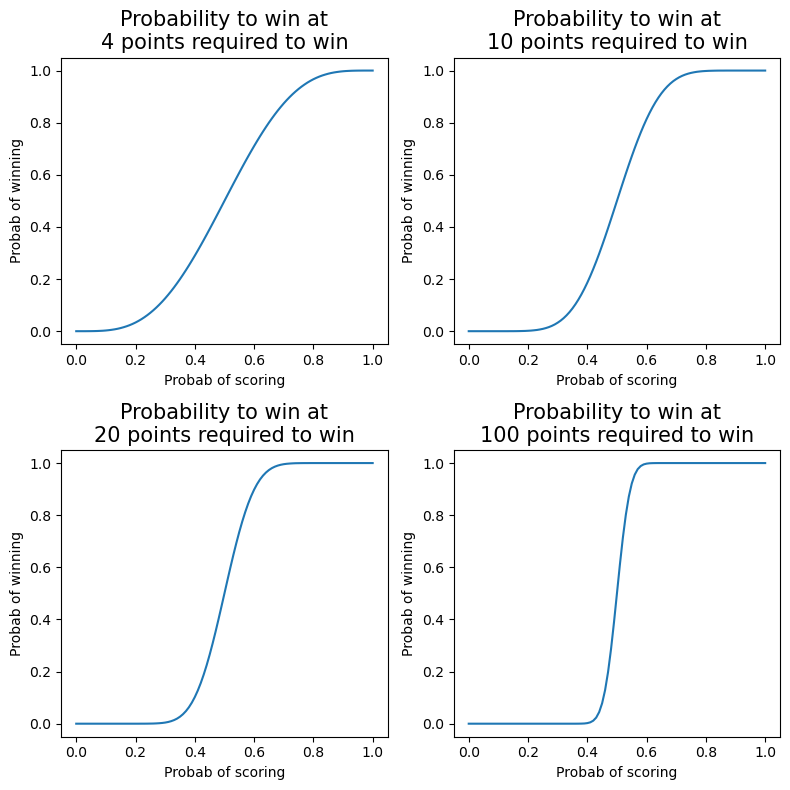

In [47]:
probab_scoring_range = np.linspace(0,1,101)

fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(nrows=2,ncols=2, figsize=(8,8))

for ax_th, points_to_win in zip([ax1,ax2,ax3,ax4], [4,10,20,100]):
    sns.lineplot(x=[proba for proba in probab_scoring_range],
                 y=[p_win(proba, points_to_win) for proba in probab_scoring_range],
                 ax=ax_th
                )
    ax_th.set_title(f'Probability to win at\n{points_to_win} points required to win', size=15)
    ax_th.set(xlabel='Probab of scoring', ylabel='Probab of winning')
plt.tight_layout()
plt.show()